#  Analyzing New Residential Multifamily Construction in the City of Seattle
December 8, 2025
DATA 512 Final Project
Sarah Innis

# Introduction
Affordable housing was one of the top issues in the Seattle elections this fall. Affordable housing is an inherently human-centered issue as it directly impacts quality of life. Many argue that the only way to achieve affordable housing is by increasing housing supply. This project performs a geospatial analysis of new residential multi-family housing permits in the City of Seattle to visualize how they are distributed throughout the city and analyze how the multifamily housing supply is growing relative to the population. This is useful from a human-centered perspective because it assesses new housing locations from a geo-equity lens. This analysis will determine which areas of Seattle might become much denser over the next few years and whether certain areas are much less impacted. While increased housing should bolster affordability in areas, construction can negatively impact present communities with noise or traffic disruptions. This analysis will help show the human impact of this construction and whether some neighborhoods are uniquely affected. It will also show whether people in some Seattle City Council Districts will experience less added housing in their area, which could lead to affordability impacts.

This project predominantly uses the City of Seattle Building Permits Database. This data represents all permits filed with the Seattle Department of Construction and Inspections (SDCI). It includes permit types, statuses, and locations. This dataset is integrated with the Seattle City Council Districts map and population data. The Seattle Council Districts data is a geospatial file that allows users to plot the City Council districts and provides population information from the American Community Survey. See `README.md` and `LICENSE.txt` for more information on what the datasets include and their licenses. There are no ethical considerations in using this dataset. This data is provided by the government specifically so their actions can be auditable.

---

# Background and Related Work

Within the United States, research has identified housing shortages as a key barrier to housing affordability. A webpage from the U.S. Chamber of Commerce cites a Zillow statistic that there is a 4.7 million–home shortage in the U.S. [1]. Some causes of this deficit are underbuilding during the Great Recession and millennials reaching homebuying age. This shortage has resulted in one-third of U.S. households being cost-burdened, meaning they spend more than a third of their income on housing. This has led to a large migration out of the most populous areas and, according to the Chamber of Commerce, lost economic opportunity as people are forced to leave their jobs to move to areas with affordable housing.

These trends within the United States have also been observed within the City of Seattle, where a similar number of households are cost-burdened. Reporters such as those at *The Seattle Times* have closely followed development efforts to increase housing supply in response to affordability problems. *The Seattle Times* conducted a very similar analysis (published September 12, 2025) to the one completed in this project [2]. This article described slowdowns in adding new housing in Seattle and claimed that the supply of new apartments will drop and increase prices. Alexis Weisend makes these points using permit data analyzed by Mark Nowlin. This analysis found that in the first six months of 2025, apartment permitting was down 66% and that since 2023, permit numbers in King County and Seattle have been half of those completed per year in 2020–2022. In addition to permit slowdowns, Weisend cites developers who are pausing plans for apartments until construction costs decline. According to Mortenson's construction cost index, costs have risen 46% since 2020. This is especially challenging since interest rates are higher and developers cannot finance projects as easily as they could during the pandemic. As pandemic-era construction is completed, 10,300 apartments came on the market last year. This slowed rent increases to 1.3%, but as evidenced by the permit data and conversations with developers, new construction has slowed significantly and much higher rent increases seem likely to follow.

While it might seem that this analysis fulfills the purpose of this study, the present project aims to add important human-centered aspects. This analysis examines which communities are most impacted by housing additions and adds a geospatial lens to understand where new housing is being added in Seattle. *The Seattle Times* analysis also did not include any information needed to reproduce their analysis. This project allows anyone to understand how the data was processed and how conclusions were reached. Another related work is the “Shaping Seattle: Property and Building Permits” map visualization available on the SDCI website [3]. While this visualization does include a geospatial distribution of permits, this analysis simplifies understanding by grouping permits by Council District and including only residential permits so that housing impacts are more digestible. A Seattle City Council District is a geographical area represented by a member of the Seattle City Council. Districts are redistricted slightly after every decennial census to keep populations roughly equal.

---

# Research Questions

This analysis aims to answer the following research questions:

1. **How is the multifamily housing supply changing within Seattle?**
2. **Where is new multifamily housing being added?**
3. **Are Seattle City Council Districts impacted differently by multifamily housing additions?**
4. **As the population grows, how do we expect the number of large multifamily buildings per resident to change?**

The goal of these questions is to understand which areas in Seattle might be most impacted by densification. This can help the city plan for additional resources such as schools. It can also help identify areas where housing supply might need to be added to slow the growth of housing prices. The questions also aim to determine whether the number of multifamily buildings completed will keep up with population growth.

---

# Methodology

### Datasets

* Seattle Department of Construction and Inspection Permit Data
* Seattle City Council Geography and Population Data
* Seattle Office of Economic and Revenue Forecasts (SOERF) – Population
* Federal Funds Effective Rate (Interest Rate)

All data is provided in the repository. See `README.md` and `LICENSE.txt` for more information on datasets. Intermediate cleaned datasets are saved as:

* `data/permits_cleaned_20251106.csv`
* `data/council_districts_clean.shp`

All code is provided below.
Primary plots supporting the results are in the `plots/` directory.

### Methods

To answer research question 1, a time series graph was created to visualize trends in the number of permit applications and permit completions per year. Multifamily buildings were then grouped according to the number of units so that trends in different building sizes could be observed for both permit applications and completions.

To answer research question 2, the latitude and longitude of the permits were used to determine which Council District each permit fell in. A choropleth visualization was used to answer this question.

To answer research question 3, population counts were joined with the Seattle City Council and permit map data to create another choropleth, where the visualization depicted the number of new housing units per resident in each Council District. Darker areas on the choropleth indicate districts more impacted by housing additions.

To answer research question 4, the goal was to predict the number of large multifamily buildings completed in the next five years. ARIMA and SARIMAX models were fitted to forecast permit completions. SARIMAX extends ARIMA by incorporating seasonal (S) and exogenous (X) components. Because the data is annual, no seasonal adjustment was needed. Exogenous features represent external factors that may influence the relationship between time and completed permits. Potential exogenous variables include COVID-19 indicator terms, King and Snohomish County population, the federal funds interest rate, and the number of submitted permit applications. A baseline model without exogenous variables (ARIMA) was compared with SARIMAX models that included different combinations of these predictors. The model with the lowest mean absolute error was selected for forecasting. After generating forecasts, the number of buildings completed was divided by the year-over-year population change (in thousands), and this metric was visualized over time to address the original question.

Line graphs were used because they allow users to understand changes over time. Choropleth maps were chosen because they allow the user to understand changes in a metric by geographic area. ARIMA and SARIMAX models were chosen because they have an interpretable statistical basis and are standard for time series prediction.

---

# Findings

All findings summarized here are based on the final visualizations in the plots folder.

**Research Question 1:** Multifamily housing supply changes within Seattle were visualized with time series graphs of permit applications and completions. Overall, permit applications have declined since 2020. Much of this decline can be attributed to multifamily buildings with six units or fewer, which make up the majority of multifamily building permits. Permit completions increased rapidly between 2013 and 2015 but have increased more slowly since then.

**Research Question 2:** The largest number of housing units are being added in Council Districts 2, 3, and 7.

**Research Question 3:** The largest number of housing units per person are being added in Council Districts 2, 3, and 7. However, the magnitude difference is modest at about 80 units per 1,000 people.

**Research Question 4:** Based on the findings in research question 1—that different multifamily building sizes have had differing trends in permit applications and completions—this question focused on large multifamily buildings, defined as having more than 33 units. A SARIMAX model was created to predict the number of large multifamily buildings completed per year. The number of large multifamily buildings per year per population change in thousands was then calculated. The results showed that the ratio of buildings to population change is expected to increase twofold in the next five years.

---

# Discussion

The practical implications of the findings are that more large multifamily buildings per person can be expected in the future. The analysis also found that federal interest rates slowed new permit applications. Programs to help lower the cost of new construction would be beneficial to stimulate increases in housing supply.

The human-centered and ethical considerations of the findings are that Council Districts experienced mixed impacts from building. The Seattle Department of Construction and Inspections should keep this in mind in permit reviews and in setting zoning laws to spread both the benefits of affordability and the burdens of construction more equitably across areas. This analysis also contributes human-centered methodology by focusing on new units per person and buildings per population change.

Some limitations of this analysis include the use of Council Districts for geographic analysis. Council Districts are designed to have nearly equal populations, but it might be more insightful to examine population changes per land area in smaller geographic units to better understand the human impact of densification. Another limitation is that single-family homes were not considered. In some areas, construction may be occurring but dominated by single-family homes due to zoning.

---

# Conclusion

This analysis focuses on human impacts in both its goals and methodology. It provides insight into where multifamily housing is being added in Seattle and how that growth compares to population increases. By adding geospatial analysis and predictive modeling, this project expands on prior work that focused solely on permit trends. All code and data are provided to ensure full reproducibility and enable further exploration.

---

# References
[1]	M. H. Lucy Isabella, “The State of Housing in America.” Accessed: Nov. 08, 2025. [Online]. Available: https://www.uschamber.com/economy/the-state-of-housing-in-america  
[2]	“Renting in Seattle area to get harder,” The Seattle Times. Accessed: Nov. 08, 2025. [Online]. Available: https://www.seattletimes.com/business/real-estate/renting-in-seattle-area-to-get-harder-as-supply-of-new-apartments-drop/  
[3]	“Shaping Seattle: Property & Building Permits | seattle.gov.” Accessed: Nov. 08, 2025. [Online]. Available: https://web.seattle.gov/SDCI/ShapingSeattle/buildings  

---

# Code
To run this code, create a conda environment as specified in the environment.yml so that you have the required packages.
Intermediate data after processing has been saved to the data folder to `data/permits_cleaned_20251106.csv` and `council_districts_clean.shp`
Primary plots used for results discussion have been saved to the `/plots` directory.

## Load Packages

In [459]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import openpyxl
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from shapely.geometry import Point
import pmdarima as pm
import statsmodels.api as sm

## Load in and Prepare the Data
### SDCI Permits Data
Bring in and preview Seattle Building Permits data. See README for a description of the fields.

In [460]:
permits = pd.read_csv('data/Building_Permits_20251106.csv')
permits.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_27164\4127347995.py:1: DtypeWarning: Columns (25,26,27,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('data/Building_Permits_20251106.csv')


,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,InitialReviewCompleteDate,PlanReviewCompleteDate,DaysIssuePermitCity,ReadyToIssueDate,Zoning,DwellingUnitType,StandardPlan,DependentBuilding,ParentPermitNum,HousingCategory
0,3001776-EX,Commercial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,3002256-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANCELLED 3/8...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3002287-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,3003446-EX,Industrial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Shoreline Exemption,Exception/Exemption Request for: CANCELLED 3/2...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,3003449-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANCELED PER ...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


Fix all the columns that are a number of days so the datatype is numeric.

In [461]:
cols_to_clean = ['TotalDaysPlanReview', 'DaysInitialPlanReview', 'DaysPlanReviewCity', 'DaysIssuePermitCity']

permits[cols_to_clean] = permits[cols_to_clean].apply(
    lambda s: pd.to_numeric(s.astype(str).str.replace(',', ''), errors='coerce')
)

InitialReviewCompleteDate, AppliedDate, IssuedDate, CompletedDate should be timestamps.

In [462]:
permits['InitialReviewCompleteDate'] = pd.to_datetime(permits['InitialReviewCompleteDate'], format='%Y %b %d %I:%M:%S %p', errors = 'coerce')
permits['AppliedDate'] = pd.to_datetime(permits['AppliedDate'])
permits['IssuedDate'] = pd.to_datetime(permits['IssuedDate'])
permits['CompletedDate'] = pd.to_datetime(permits['CompletedDate'])

Filter the data to focus on permits to build new multifamily housing. 

In [463]:
permits_filtered = permits[(permits['PermitClass'] == 'Multifamily') & (permits['PermitClassMapped'] == 'Residential') & (permits['PermitTypeMapped'] == 'Building') 
                               & (permits['HousingUnitsAdded'] > 0)]

Create columns to store the year application completed, permit issued, and permit completed.
Filter the data to focus on permits where the application was submitted between 2013 and 2024.

In [464]:
permits_filtered_2 = permits_filtered.copy()
permits_filtered_2['AppliedYear'] = permits_filtered_2['AppliedDate'].dt.year.astype('Int64')
permits_filtered_2['IssuedYear'] = permits_filtered_2['IssuedDate'].dt.year.astype('Int64')
permits_filtered_2['CompletedYear'] = permits_filtered_2['CompletedDate'].dt.year.astype('Int64')

Filter the data to focus on permits where the application was submitted between 2013 and 2024.

In [465]:
permits_filtered_3 = permits_filtered_2[(permits_filtered_2['AppliedYear'] >= 2013) & (permits_filtered_2['AppliedYear'] <= 2024)]

Wrote cleaned data to a .csv file for data analysis. Uncomment if processing changes and it is desired to update the data used in further analysis. 

In [466]:
# permits_filtered_3.to_csv('data/permits_cleaned_20251106.csv')

### Seattle City Council Districts Map Data
Bring in and preview the Seattle City Council Districts data. See README for a description of the fields.

In [467]:
council = gpd.read_file('data/council_districts/council_districts_10_20_PL.shp')
council.head()

,COUNCIL_DI,F2010_PL_d,F2010_PL_1,F2010_PL_2,F2010_PL_3,F2010_PL_4,F2010_PL_5,F2010_PL_6,F2010_PL_7,F2010_PL_8,...,F2000_P_10,F2000_P_11,F2000_PL_M,F2000_P_12,F2000_P_13,F2000_PL_U,F2000_P_14,F2000_P_15,F2000_P_16,geometry
0,1,91111,86176,65612,6741,1091,8700,609,3423,4935,...,267,3561,26628,69467,16904,8377,39449,37864,1585,"MULTIPOLYGON (((1257068.2 220992.2, 1257068.4 ..."
1,2,92186,86819,29009,19759,747,32908,675,3721,5367,...,264,4722,64584,67115,20165,17262,32734,31202,1532,"POLYGON ((1282048.98 218689.668, 1282051.5 218..."
2,3,85032,80719,61595,9171,543,7423,210,1777,4313,...,258,2989,26120,69919,9725,5225,44799,42709,2090,"MULTIPOLYGON (((1273718.3 241487.3, 1273744.8 ..."
3,7,71223,68088,56104,3657,664,6419,186,1058,3135,...,140,1740,12132,56148,4508,1308,35838,32847,2991,"POLYGON ((1261450.566 243696.809, 1261491.966 ..."
4,6,89496,85624,77846,1326,491,4747,141,1073,3872,...,241,2385,11141,70720,12028,2598,41699,40336,1363,"MULTIPOLYGON (((1257277.621 259776.267, 125773..."


Plot the Council Districts on a map.

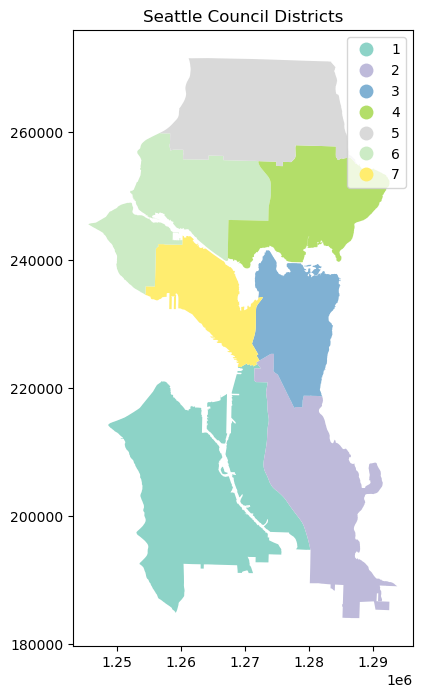

In [468]:
council["COUNCIL_DI"] = council["COUNCIL_DI"].astype("category")
fig, ax = plt.subplots(figsize=(8,8))
council.plot(ax=ax, column='COUNCIL_DI', cmap='Set3', legend=True)
plt.title("Seattle Council Districts")
plt.show()

Select only columns that will be used in this analysis. The only fields needed are council district number, 2020 population, and geometry for plotting.

In [469]:
council_clean = council[['COUNCIL_DI', 'F2020_PL_d', 'geometry']]
council_clean.head()

,COUNCIL_DI,F2020_PL_d,geometry
0,1,105699,"MULTIPOLYGON (((1257068.2 220992.2, 1257068.4 ..."
1,2,105203,"POLYGON ((1282048.98 218689.668, 1282051.5 218..."
2,3,104865,"MULTIPOLYGON (((1273718.3 241487.3, 1273744.8 ..."
3,7,104808,"POLYGON ((1261450.566 243696.809, 1261491.966 ..."
4,6,105835,"MULTIPOLYGON (((1257277.621 259776.267, 125773..."


Output file ready for analysis to shape file. Uncomment this line if you change processing and want to rewrite the file used for data analysis.

In [470]:
# council_clean.to_file('data/council_districts/council_districts_clean.shp')

## Research Question 1: How is the housing supply changing within Seattle?
Read in permit data that was cleaned above.

In [471]:
permits = pd.read_csv('data/permits_cleaned_20251106.csv')

Fix datatypes again.

In [472]:
permits['InitialReviewCompleteDate'] = pd.to_datetime(permits['InitialReviewCompleteDate'], format='%Y %b %d %I:%M:%S %p', errors = 'coerce')
permits['AppliedDate'] = pd.to_datetime(permits['AppliedDate'])
permits['IssuedDate'] = pd.to_datetime(permits['IssuedDate'])
permits['CompletedDate'] = pd.to_datetime(permits['CompletedDate'])
permits['AppliedYear'] = permits['AppliedYear'] .astype('Int64')
permits['CompletedYear'] = permits['CompletedYear'].astype('Int64')

Group permits by the year they were applied for and completed. Count the number applied for and completed per year.

In [473]:
applications_by_year = (
    permits['AppliedYear']
    .value_counts()
    .sort_index()
    .rename_axis('Year')
    .reset_index(name='ApplicationCount')
)

completions_by_year = (
    permits['CompletedYear']
    .value_counts()
    .sort_index()
    .rename_axis('Year')
    .reset_index(name='CompletionCount')
)

Combine applied and completed data so that they can be plotted on the same graph.
Visualize how many permit applications are submitted for multifamily buildings per year and how many permits are completed for multifamily buildings per year.

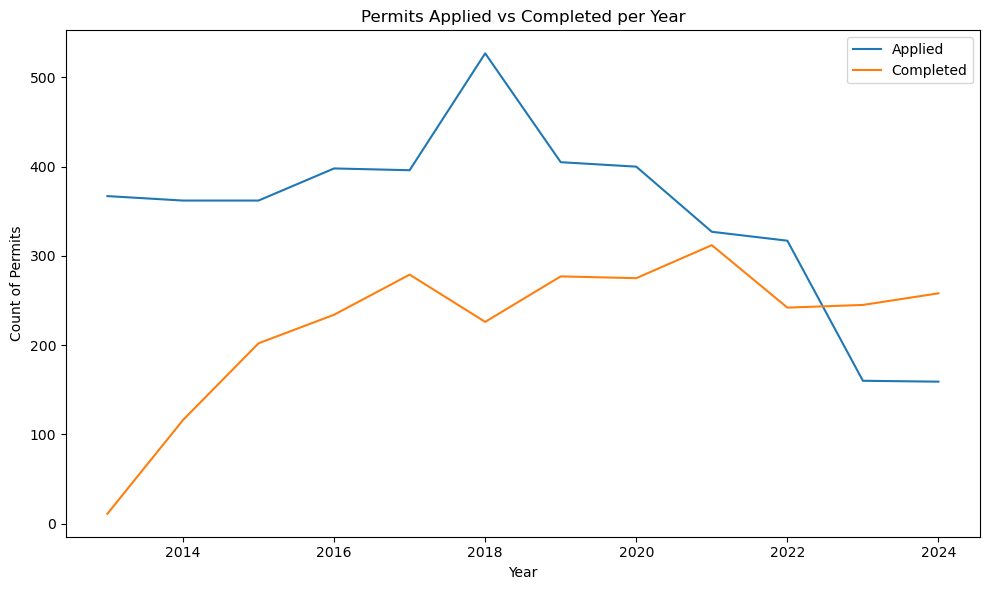

In [474]:
permits_by_year = pd.merge(applications_by_year, completions_by_year, how = 'inner')

permits_by_year.plot(x = 'Year', kind='line', figsize=(10,6))
plt.title("Permits Applied vs Completed per Year")
plt.xlabel("Year")
plt.ylabel("Count of Permits")
plt.legend(["Applied", "Completed"])
plt.tight_layout()

# Save the plot  Uncomment if you want to overwrite plots
# plt.savefig("plots/permits_applied_vs_completed.png", dpi=300)

plt.show()

Between 2013 and 2024, how many additional units were completed?

In [475]:
units_added = int(permits['HousingUnitsAdded'].sum())
units_added

87687

What size multifamily buildings are permit applications for?<br>
Break permits up by number of units being added. Then count the number of applications per year per size. Plot the trend over time.

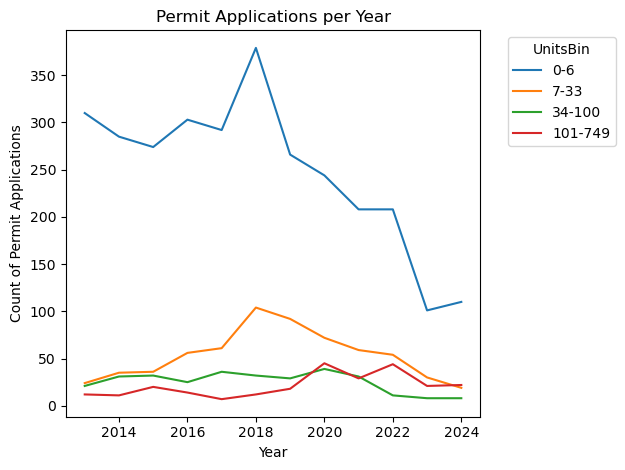

In [476]:
# Create size bins
bins = [0, 6, 33, 100, 750]
labels = ['0-6', '7-33', '34-100', '101-749']
permits['UnitsBin'] = pd.cut(permits['HousingUnitsAdded'], bins=bins, labels=labels, right=True)

applications_by_year_size = (
    permits.groupby(['AppliedYear', 'UnitsBin'], observed = True)
    .size()
    .reset_index(name='ApplicationCount')
    .sort_values(['AppliedYear', 'UnitsBin'])
)

ax = applications_by_year_size.pivot(
    index='AppliedYear',
    columns='UnitsBin',
    values='ApplicationCount'
).plot()

ax.set_title("Permit Applications per Year")
ax.set_ylabel("Count of Permit Applications")
ax.set_xlabel("Year")
ax.legend(title="UnitsBin", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the plot  Uncomment if you want to overwrite plots
# plt.savefig("plots/permits_applied_grouped_by_size.png", dpi=300)

plt.show()

What size multifamily buildings have been completed?<br>
Break permits up by number of units being added. Then count the number of completions per year per size. Plot the trend over time.

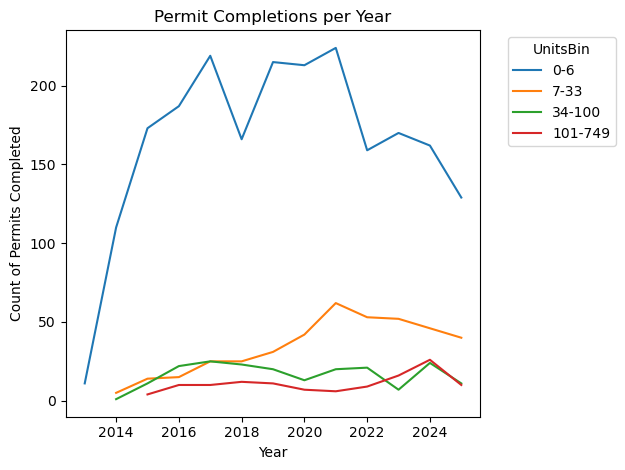

In [477]:
completions_by_year_size = (
    permits.groupby(['CompletedYear', 'UnitsBin'], observed = True)
    .size()
    .reset_index(name='Count')
    .sort_values(['CompletedYear', 'UnitsBin'])
)

ax = completions_by_year_size.pivot(
    index='CompletedYear',
    columns='UnitsBin',
    values='Count'
).plot()

ax.set_title("Permit Completions per Year")
ax.set_ylabel("Count of Permits Completed")
ax.set_xlabel("Year")
ax.legend(title="UnitsBin", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the plot  Uncomment if you want to overwrite plots
# plt.savefig("plots/permits_completed_grouped_by_size.png", dpi=300)

plt.show()

**Research Question 1 Discussion**: Generally, new multifamily permit applications started declining in 2020. Completed permits rose sharply 2013-2015 but is now slowly increasing. When data is separated by unit size it can be seen that the majority of permits are for buildings with 6 or fewer units. It can also be seen that in 2021 the completion of this type of building size has started declining sharply. 34+ unit buildings have a fairly steady trend with completions and applications while 7-33 unit buildings have been on the rise.

## Research Question 2: Where are new multifamily units being added?

Read in council district data that was cleaned above. 

In [478]:
council = gpd.read_file('data/council_districts/council_districts_clean.shp')

Filter out permits that will not be built.

In [479]:
permits_current = permits[~permits['StatusCurrent'].isin(['Canceled', 'Withdrawn', 'Denied'])]

To utilize geopandas for plotting, convert permit longitude and latitude data to GeoDataFrame.

In [480]:
geometry = [Point(xy) for xy in zip(permits_current['Longitude'], permits_current['Latitude'])]
permits_gdf = gpd.GeoDataFrame(permits_current, geometry=geometry, crs="EPSG:4326")

Perform a spatial join to assign each permit to a council district.

In [481]:
permits_with_district = gpd.sjoin(permits_gdf, council.to_crs(epsg=4326), how = 'inner', predicate = 'within')

Count added housing units by council district.

In [482]:
units_by_district = permits_with_district.groupby('COUNCIL_DI', observed = False)['HousingUnitsAdded'].sum().reset_index()

Add housing additions to the council GeoDataFrame.

In [483]:
council_units = council.merge(units_by_district, on = 'COUNCIL_DI', how = 'left')
council_units['HousingUnitsAdded'] = council_units['HousingUnitsAdded'].fillna(0)

Plot number of housing units added per council district.

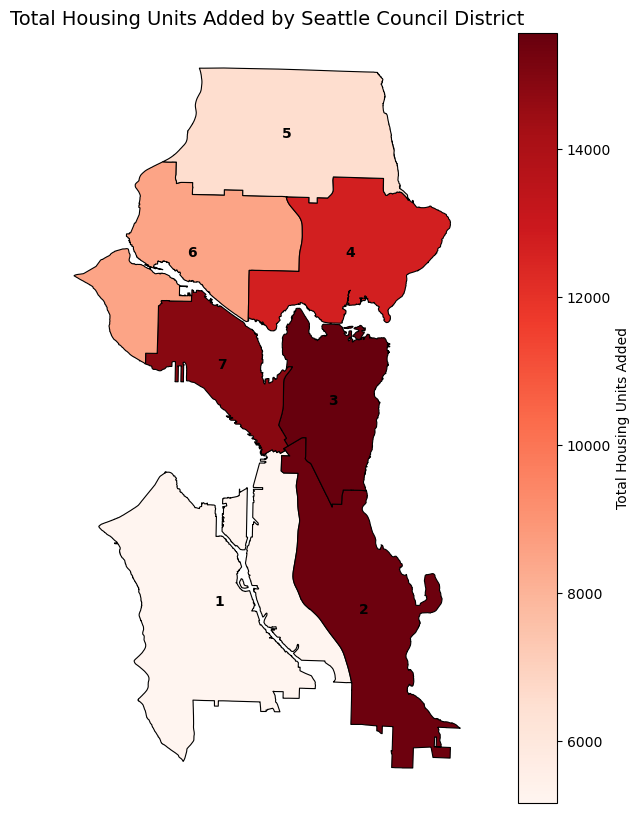

In [484]:
fig, ax = plt.subplots(figsize=(10, 10))
council_units.plot(
    column='HousingUnitsAdded',
    cmap='Reds',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Total Housing Units Added", 'orientation': "vertical"},
    ax=ax
)

# add council district label
for idx, row in council_units.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        str(int(row['COUNCIL_DI'])),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title("Total Housing Units Added by Seattle Council District", fontsize=14)
plt.axis('off')

# Save the plot  Uncomment if you want to overwrite plots
# plt.savefig("plots/housing_units_added_by_CD.png", dpi=300)

plt.show()

**Research Question 2 Discussion**: Darker council districts have a larger number of new housing units being added. The council districts with the largest number of housing units being added is 2, 3, and 7. One thing to note is that districts such as downtown have a higher density than other districts. The next research question will take into account the existing population in a council district to determine if City Council Districts are impacted differently.

### Research Question 3: Are Seattle City Council Districts impacted differently by multifamily housing additions?

Plot the population in 2020 of each Council District. Council Districts are redistricted after every decennial census to try to keep the populations represented roughly equal. Note the difference between districts is pretty small at about max 800 people.

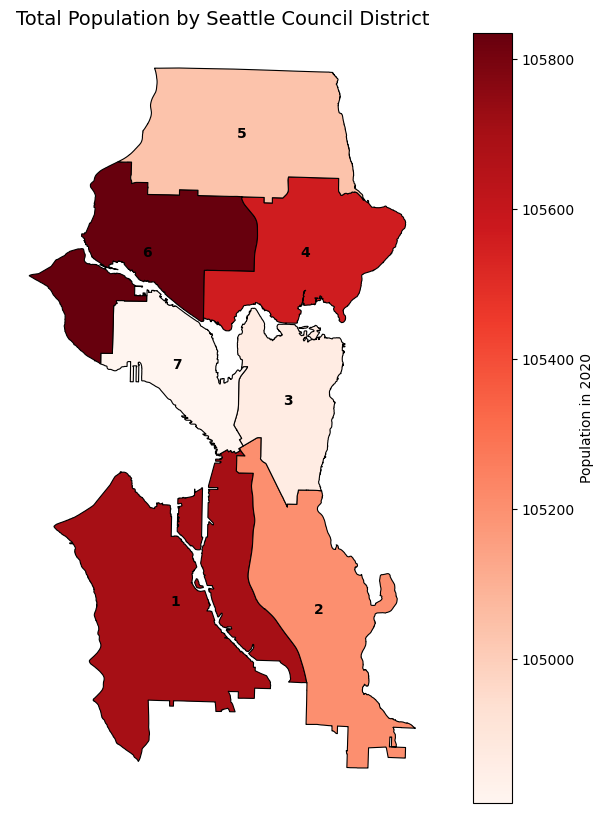

In [485]:
fig, ax = plt.subplots(figsize=(10, 10))
council_units.plot(
    column='F2020_PL_d',
    cmap='Reds',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Population in 2020", 'orientation': "vertical"},
    ax=ax
)

# add council district label
for idx, row in council_units.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        str(int(row['COUNCIL_DI'])),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title("Total Population by Seattle Council District", fontsize=14)
plt.axis('off')

# Save the plot  Uncomment if you want to overwrite plots
# plt.savefig("plots/population_by_CD.png", dpi=300)

plt.show()

Create a new column called AddedUnitsPerPerson by dividing HousingUnitsAdded by the population of each district.

In [486]:
council_units['AddedUnitsPerPerson'] = council_units['HousingUnitsAdded']/council_units['F2020_PL_d']

Visualize AddedUnitsPerPerson per Council District.

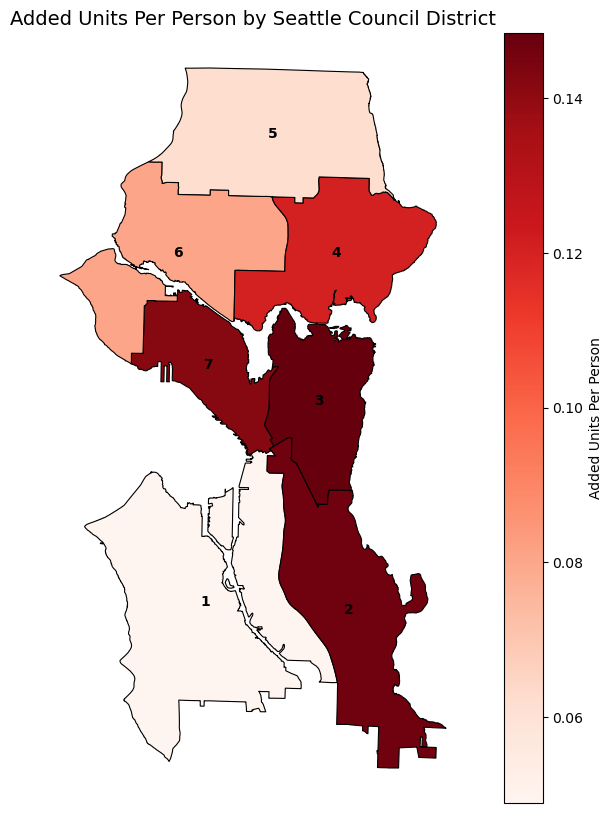

In [487]:
fig, ax = plt.subplots(figsize=(10, 10))
council_units.plot(
    column='AddedUnitsPerPerson',
    cmap='Reds',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Added Units Per Person", 'orientation': "vertical"},
    ax=ax
)

# add council district label
for idx, row in council_units.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        str(int(row['COUNCIL_DI'])),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title("Added Units Per Person by Seattle Council District", fontsize=14)
plt.axis('off')

# Save the plot  Uncomment if you want to overwrite plots
# plt.savefig("plots/housing_units_added_per_person_by_CD.png", dpi=300)

plt.show()

**Research Question 3 Discussion**: The chloropleth showed that the Seattle City Council Districts have very similar starting populations. When population was taken into account, we still see that Council Districts 2, 3, and 7 are experiencing the greatest number of units added per person. This magnitude is not very large with the largest difference being about 80 units per 1000 people.

### Research Question 4: As the population grows, how do we expect the number of large multifamily buildings per resident to change?

To answer this question, we must predict the number of large multifamily buildings completed in the next 5 years. We can fit ARIMA and SARIMAX models to predict permit completions. SARIMAX models are ARIMA models with seasonal (S) and exogenous (X) features. In this case no seasonal adjustment will be used since the data is on the yearly level. Exogenous features are external factors that might impact the trend between time and completed permits. Some features we will include are COVID-19 indicator variables, King and Snohomish County population, federal funds interest rate, and number of permit applications submitted. We will fit a model with no exogenous features (ARIMA) and ones with different combinations of exogenous features and choose the one with lowest mean absolute error to forecast permit completions.
#### Create COVID indicators exogenous feature
Covid impacted the economy as well as social dynamics and whether work could be done in person. It could impact how much and what types of housing being built.
Create indicator variables to indicate whether a year is pre-covid, covid, or post-covid.

In [488]:
# create more years than in the data for future forecasting
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
}

covid_df = pd.DataFrame(data)
# pre_covid is before 2020
covid_df['pre_covid'] = (covid_df['Year'] < 2020).astype(int)
# covid is 2020-2023
covid_df['covid'] = ((covid_df['Year'] >= 2020) & (covid_df['Year'] <= 2023)).astype(int)
# post-covid is 2023+
covid_df['post_covid'] = (covid_df['Year'] > 2023).astype(int)

#### Population and Interest Rates
New housing needs to be built if the population is growing. High interest rates discourage new building as it will be more expensive to finance. Bring in data on population and interest rate trends. 
For years 2025-2030, population values were forecasted by City of Seattle Office of Economic and Revenue Forecasts. Values were taken from the Baseline forecast see README. Past population values were also used from this source.
See README for interest rate data citation. Interest rates for the years 2025-2030 were assumed to be constant as on 11/23/2025 at about 4%.
Read in data file containing population and interest rate data.

In [489]:
pop_interest_per_year = pd.read_excel('./data/Pop_Interest_Per_year.xlsx')
pop_interest_per_year.head()

,Year,Population,InterestRate
0,2011,2670.4,0.101667
1,2012,2694.5,0.140000
2,2013,2736.6,0.107500
3,2014,2786.5,0.089167
4,2015,2849.5,0.132500


Plot interest rate and population changes over time.

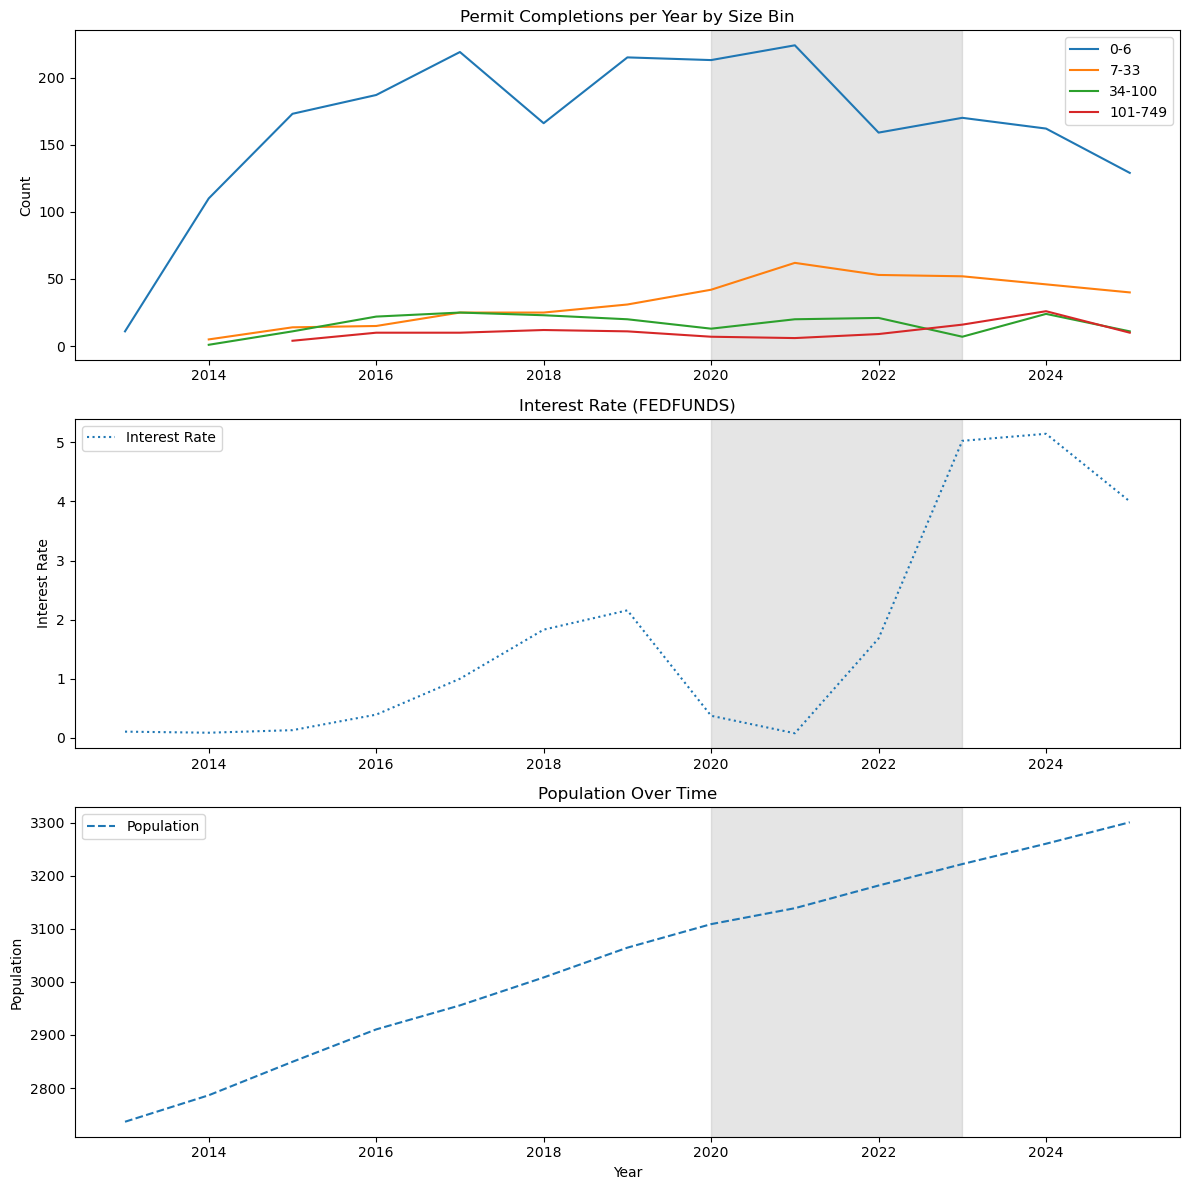

In [490]:
comp = completions_by_year_size.pivot(
    index='CompletedYear', 
    columns='UnitsBin', 
    values='Count'
)

comp = comp.reset_index().rename(columns={'CompletedYear': 'Year'})
comp_exog = comp.merge(pop_interest_per_year, on = 'Year', how = 'left').merge(covid_df, on = 'Year', how = 'left')
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Subplot 1: Permit Completions Over Time
apps_cols = ['0-6', '7-33', '34-100', '101-749']
comp_exog.plot(x='Year', y=apps_cols, ax=axes[0])

axes[0].set_title("Permit Completions per Year by Size Bin")
axes[0].set_ylabel("Count")
axes[0].axvspan(2020, 2023, color='gray', alpha=0.2)

# Force x-axis labels
axes[0].tick_params(axis='x', labelbottom=True)
axes[0].set_xlabel("Year")

# Subplot 2: Federal Funds Effective Rate Over Time
axes[1].plot(comp_exog['Year'], comp_exog['InterestRate'], linestyle=':', label="Interest Rate")
axes[1].set_title("Interest Rate (FEDFUNDS)")
axes[1].set_ylabel("Interest Rate")
axes[1].axvspan(2020, 2023, color='gray', alpha=0.2)
axes[1].legend()

# Force x-axis labels
axes[1].tick_params(axis='x', labelbottom=True)
axes[1].set_xlabel("Year")

# Subplot 3: Population Over Time
axes[2].plot(comp_exog['Year'], comp_exog['Population'], linestyle='--', label="Population")
axes[2].set_title("Population Over Time")
axes[2].set_ylabel("Population")
axes[2].set_xlabel("Year")
axes[2].axvspan(2020, 2023, color='gray', alpha=0.2)
axes[2].legend()

plt.tight_layout()
plt.show()


We can see that covid is associated with a hike in the federal funds rate. We can also see that population is steadily increasing. We can also see that the decline in 6 and under unit homes aligns with the start of interest rate increases. This suggests these will be good predictors for amount of permits completed.

What is the average amount of time it takes to complete a building based on the number of units?

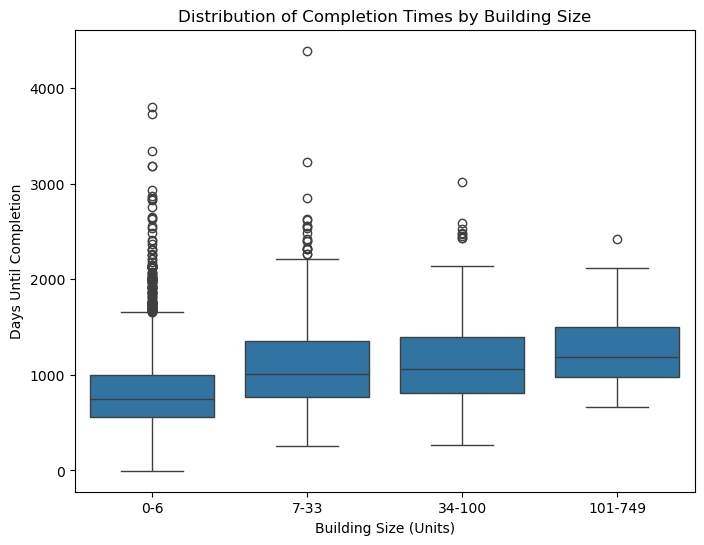

In [491]:
permits['DaysUntilCompletion'] = permits['CompletedDate'] - permits['AppliedDate']
permits['DaysUntilCompletion'] = permits['DaysUntilCompletion'].dt.days

plt.figure(figsize=(8,6))
sns.boxplot(
    data=permits,
    x='UnitsBin',
    y='DaysUntilCompletion'
)
plt.xlabel("Building Size (Units)")
plt.ylabel("Days Until Completion")
plt.title("Distribution of Completion Times by Building Size")
plt.show()

Calculate the median number of days it takes to complete a build per unit size. This will be used to inform which year the interest rate should be used as a predictor since financing is secured at the start of a project. For buildings with 7+ units, the interest rate three years prior will be used since it takes about 3 years from the time the permit application is complete. 

In [492]:
completion_by_size = permits.groupby('UnitsBin', observed = True)['DaysUntilCompletion'].median()
completion_by_size

UnitsBin
0-6         743.0
7-33       1010.0
34-100     1056.5
101-749    1189.0
Name: DaysUntilCompletion, dtype: float64

#### Fit Arima Model on Buildings in UnitsBin 34-100 and 101-749
Earlier it was seen that trends in permit applications and completions vary based on building size. For this research question, I will focus on large multifamily which I will define as having more than 33 units. This should help keep my predictions more accurate.

Filter for permits for buildings with more than 33 units.

In [493]:
permits_large = permits[permits['UnitsBin'].isin(['34-100', '101-749'])]

Prepare data for modeling. Hold out data from 2023 and 2024 to use as test data.

In [494]:
permits_select = permits_large[['PermitNum', 'HousingUnitsAdded', 'AppliedDate', 'IssuedDate', 'CompletedDate', 'StatusCurrent', 'AppliedYear', 'IssuedYear', 'CompletedYear', 'UnitsBin']]
df_completed = permits_select[(permits_select["StatusCurrent"] == "Completed") & (permits_select['CompletedYear'].isna() == False)].copy()
# remove CompletedYear 2013 from data. I want to be able to start in 2014 and use year previous application amounts
df_completed= df_completed[~(df_completed['CompletedYear'] == 2013)].copy()

# create time series
ts = df_completed.groupby('CompletedYear').agg(num_completed=('CompletedYear', 'size'))
# Convert the integer year index to PeriodIndex
ts.index = pd.PeriodIndex(ts.index, freq='Y')

# train-test split
split_date = pd.Period(2022, freq='Y')
ts_train = ts[ts.index <= split_date]
ts_test = ts[ts.index > split_date]

Visualize the time series of completed permits for buildings with 34-749 units.

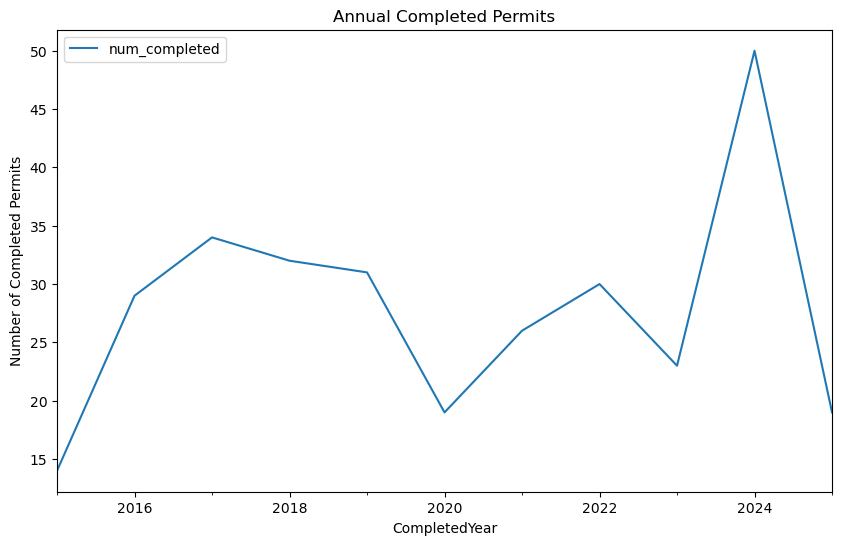

In [495]:
ts = pd.concat([ts_train, ts_test], axis = 0)
ts.plot(figsize=(10,6), title="Annual Completed Permits")
plt.ylabel("Number of Completed Permits")
plt.show()

Ad Fuller Test for Stationarity to determine if ARIMA can be used. p-value<0.05 so it passes.

In [496]:
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -3.216242034413334
p-value: 0.019063567055246998


Fit ARIMA model.

In [497]:
model = pm.auto_arima(
        ts_train,
        start_p=0, start_q=0,
        max_p=5, max_q=5,
        m=1,               
        seasonal=False,    
        stepwise=True,     
        suppress_warnings=True,
        trace=True
    )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77.815, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=62.239, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=64.154, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64.129, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58.589, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56.625, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=58.236, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.147 seconds


Calculate forecast using model and plot forecast.

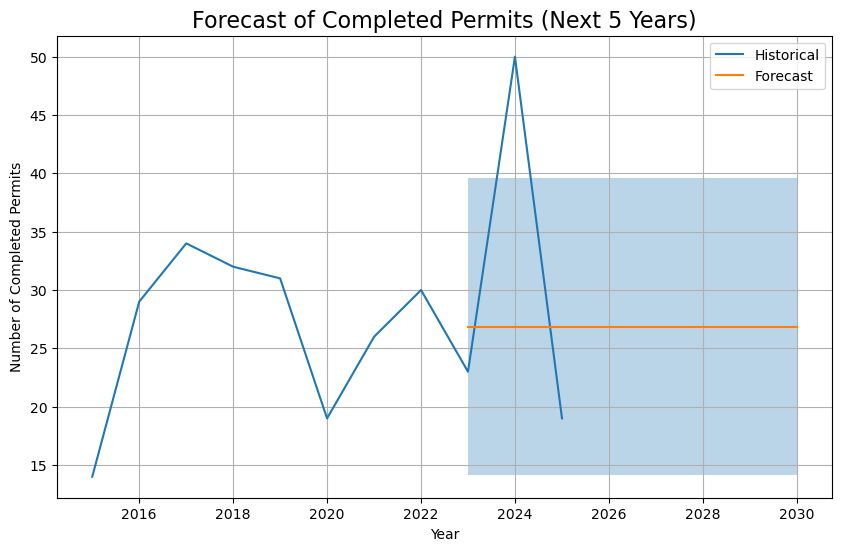

In [498]:
n_periods = 8
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = pd.period_range(
    start=ts_train.index[-1] + 1,
    periods=n_periods,
    freq='Y'
)

# Convert to Series
forecast_series = pd.Series(forecast, index=forecast_index)
conf_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower', 'Upper'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ts.index.to_timestamp(), ts['num_completed'], label='Historical')
ax.plot(forecast_series.index.to_timestamp(), forecast_series, label='Forecast')

ax.fill_between(
    conf_df.index.to_timestamp(),
    conf_df['Lower'], conf_df['Upper'],
    alpha=0.3
)

ax.set_title('Forecast of Completed Permits (Next 5 Years)', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Completed Permits')
ax.legend()
ax.grid(True)
plt.show()

Calculate mean absolute error for the years 2023 and 2024.

In [499]:
ts_test = ts_test[ts_test.index < pd.Period(2025, freq='Y')]
aligned = ts_test.join(forecast_series.rename("forecast"), how="inner")

# Compute residuals
aligned["residual"] = aligned["num_completed"] - aligned["forecast"]
aligned["abs_error"] = aligned["residual"].abs()

# Compute mean absolute error for 2023 and 2024
mae = aligned["abs_error"].mean()
mae

np.float64(13.5)

#### Fit Sarimax Model on Large Multifamily Buildings
As visualized earlier, the COVID-19 pandemic, growing population, and changes in interest rates have impacted the construction industry. See if adding in these factors as predictors increases the prediction accuracy. 
Get number of permit applications submitted per year.

In [500]:
applications_by_year_large  = applications_by_year_size[applications_by_year_size['UnitsBin'].isin(['34-100', '101-749'])]
applications_by_year_large_grouped = applications_by_year_large.groupby("AppliedYear").agg(ApplicationCount = ('ApplicationCount', 'sum')).reset_index().rename(columns={'AppliedYear': 'Year'})

Prepare data for model

In [501]:
# select relevant columns from permits
permits_select = permits_large[['PermitNum', 'HousingUnitsAdded', 'AppliedDate', 'IssuedDate', 'CompletedDate', 'StatusCurrent', 'AppliedYear', 'IssuedYear', 'CompletedYear', 'UnitsBin']]

# filter for only completed permits
df_completed = permits_select[(permits_select["StatusCurrent"] == "Completed") & (permits_select['CompletedYear'].isna() == False)].copy()
# remove CompletedYear 2013 from data. I want to be able to start in 2014 and use year previous application amounts
df_completed= df_completed[~(df_completed['CompletedYear'] == 2013)].copy()

# create time series again to add other predictors to
ts2 = df_completed.groupby('CompletedYear').agg(num_completed=('CompletedYear', 'size'))

# add covid indicator columns
ts_c = ts2.merge(covid_df, how = 'inner', left_on = 'CompletedYear', right_on = 'Year')

# grab shifted year columns
pop_interest_per_year = pop_interest_per_year.copy()
pop_interest_per_year['Year_prev'] = pop_interest_per_year['Year'] + 1
pop_interest_per_year['Year_2_prev'] = pop_interest_per_year['Year'] + 2
pop_interest_per_year['Year_3_prev'] = pop_interest_per_year['Year'] + 3

# add population column - use population from the year prior
pop_per_year_cols = ['Year_prev', 'Population']
ts_cp = ts_c.merge(pop_interest_per_year[pop_per_year_cols], how = 'inner', left_on = 'Year', right_on = 'Year_prev')

# add interest rate column - use interest rate from three years prior
int_per_year_cols = ['Year_3_prev', 'InterestRate']
ts_cpi = ts_cp.merge(pop_interest_per_year[int_per_year_cols], how = 'inner', left_on = 'Year', right_on = 'Year_3_prev')
ts_cpi = ts_cpi.drop(columns = ['Year_prev', 'Year_3_prev'])

# add application count column - use application count from the year prior
applications_by_year = applications_by_year.copy()
applications_by_year['Year_prev'] = applications_by_year['Year'] + 1
ts_cpia = ts_cpi.merge(applications_by_year, how = 'inner', left_on = 'Year', right_on = 'Year_prev')
ts_cpia.rename(columns = {'Year_x': 'Year'}, inplace = True)
ts_cpia = ts_cpia.drop(columns = ['Year_y', 'Year_prev'])
ts_cpia.set_index('Year', inplace = True)

# Convert the integer year index to PeriodIndex
ts_cpia.index = pd.PeriodIndex(ts_cpia.index, freq='Y')

# Target variable
y = ts_cpia['num_completed']

# Exogenous variables
exog = ts_cpia[['pre_covid', 'covid', 'post_covid',
        'Population', 'InterestRate', 'ApplicationCount']]

# Train-Test Split
split_date = pd.Period(2022, freq='Y')

y_train = y[y.index <= split_date]
y_test  = y[y.index > split_date]

exog_train = exog.loc[y_train.index]
exog_test  = exog.loc[y_test.index]

# 1) Convert exog to numeric numpy-friendly types
exog_train_clean = exog_train.astype(float)

# 2) Convert y to float as well
y_train_clean = y_train.astype(float)
y = pd.concat([y_train, y_test], axis = 0)

Prepare data for forecasting

In [502]:
n_periods = 8
future_years = pd.period_range(start=y_train_clean.index[-1] + 1, periods=n_periods, freq='Y')

# create exog future
exog_future = exog_test.copy()
exog_future['ApplicationCount'] = exog_future['ApplicationCount'].astype(float)

years_to_add = list(range(2025, 2031)) 
for year in years_to_add:
    exog_future.loc[pd.Period(str(year), freq='Y')] = {
        'pre_covid': 0,
        'covid': 0,
        'post_covid': 1,
        'Population': pop_interest_per_year[pop_interest_per_year['Year'] == (year - 1)]['Population'].iloc[0],
        'InterestRate': pop_interest_per_year[pop_interest_per_year['Year'] == (year - 3)]['InterestRate'].iloc[0],
        'ApplicationCount': applications_by_year['ApplicationCount'].mean()
    }

exog_future['ApplicationCount'] = exog_future['ApplicationCount'].astype(float)
exog_future

,pre_covid,covid,post_covid,Population,InterestRate,ApplicationCount
Year,,,,,,
2023,0,1,0,3181.4,0.375833,317.000000
2024,0,0,1,3221.8,0.080000,160.000000
2025,0,0,1,3260.1,1.683333,348.333333
2026,0,0,1,3300.5,5.024167,348.333333
2027,0,0,1,3340.5,5.143333,348.333333
2028,0,0,1,3376.8,4.000000,348.333333
2029,0,0,1,3411.9,4.000000,348.333333
2030,0,0,1,3446.7,4.000000,348.333333


Run model

In [503]:
model = sm.tsa.SARIMAX(
        y_train_clean,
        exog=exog_train_clean,
        order=(1,1,1),      
        seasonal_order=(0,0,0,0),  
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
results = model.fit()

c:\Users\sarah\anaconda3\envs\permits\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Note model fit failed to converge.

Create forecast

In [504]:
# create forecast 
forecast = results.get_forecast(steps=n_periods, exog=exog_future)

pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_df = pd.DataFrame({
    'forecast': pred_mean,
    'lower_ci': conf_int.iloc[:, 0],
    'upper_ci': conf_int.iloc[:, 1]
})

Plot forecast

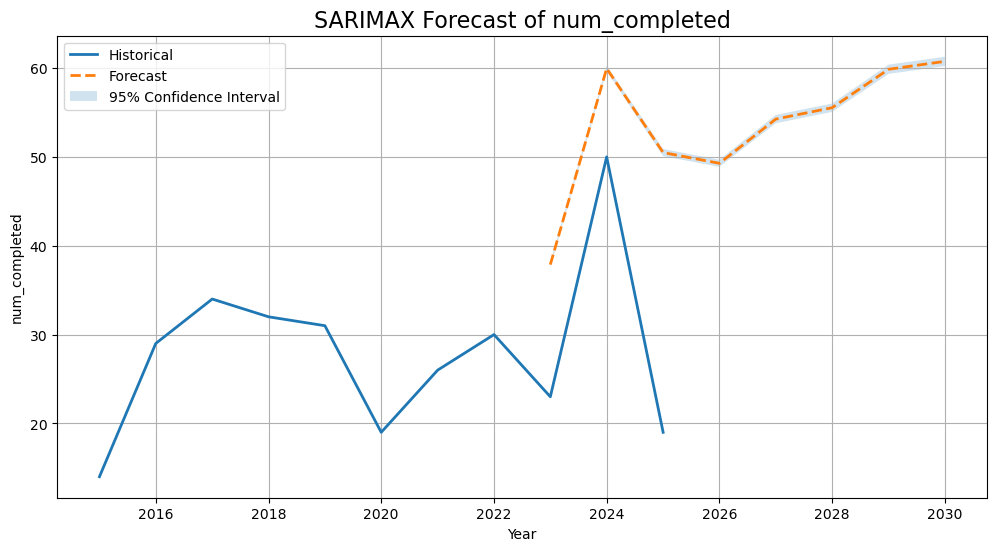

In [505]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot historical data
ax.plot(y.index.to_timestamp(), y, label='Historical', linewidth=2)

# Plot forecast
ax.plot(pred_mean.index.to_timestamp(), pred_mean, label='Forecast', linestyle='--', linewidth=2)

# Shade confidence interval
ax.fill_between(
    pred_mean.index.to_timestamp(),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.2,
    label='95% Confidence Interval'
)

ax.set_title('SARIMAX Forecast of num_completed', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('num_completed')
ax.legend()
ax.grid(True)
plt.show()

Get MAE

In [506]:
# Filter y_test to 2023 and 2024
y_test_filt = y_test[y_test.index < pd.Period(2025, freq='Y')]

# Select only the forecast column for 2023–2024
forecast_filt = forecast_df["forecast"]

# Align using concat
aligned = pd.concat(
    [y_test_filt.rename("num_completed"), forecast_filt.rename("forecast")],
    axis=1,
    join="inner"
)

# Compute residuals
aligned["residual"] = aligned["num_completed"] - aligned["forecast"]
aligned["abs_error"] = aligned["residual"].abs()

# MAE
mae = aligned["abs_error"].mean()

mae


np.float64(12.418966320402149)

#### Fit Sarimax Model on Large Multifamily Buildings
Test whether removing predicted number of applications impacts the results

Prepare model data

In [507]:
# select relevant columns from permits
permits_select = permits_large[['PermitNum', 'HousingUnitsAdded', 'AppliedDate', 'IssuedDate', 'CompletedDate', 'StatusCurrent', 'AppliedYear', 'IssuedYear', 'CompletedYear', 'UnitsBin']]

# filter for only completed permits
df_completed = permits_select[(permits_select["StatusCurrent"] == "Completed") & (permits_select['CompletedYear'].isna() == False)].copy()
# remove CompletedYear 2013 from data. I want to be able to start in 2014 and use year previous application amounts
df_completed= df_completed[~(df_completed['CompletedYear'] == 2013)].copy()

# create time series again to add other predictors to
ts2 = df_completed.groupby('CompletedYear').agg(num_completed=('CompletedYear', 'size'))

# add covid indicator columns
ts_c = ts2.merge(covid_df, how = 'inner', left_on = 'CompletedYear', right_on = 'Year')

# grab shifted year columns
pop_interest_per_year = pop_interest_per_year.copy()
pop_interest_per_year['Year_prev'] = pop_interest_per_year['Year'] + 1
pop_interest_per_year['Year_2_prev'] = pop_interest_per_year['Year'] + 2
pop_interest_per_year['Year_3_prev'] = pop_interest_per_year['Year'] + 3

# add population column - use population from the year prior
pop_per_year_cols = ['Year_prev', 'Population']
ts_cp = ts_c.merge(pop_interest_per_year[pop_per_year_cols], how = 'inner', left_on = 'Year', right_on = 'Year_prev')

# add interest rate column - use interest rate from three years prior
int_per_year_cols = ['Year_3_prev', 'InterestRate']
ts_cpi = ts_cp.merge(pop_interest_per_year[int_per_year_cols], how = 'inner', left_on = 'Year', right_on = 'Year_3_prev')
ts_cpi = ts_cpi.drop(columns = ['Year_prev', 'Year_3_prev'])

ts_cpi.set_index('Year', inplace = True)

# Convert the integer year index to PeriodIndex
ts_cpi.index = pd.PeriodIndex(ts_cpi.index, freq='Y')

# Target variable
y = ts_cpi['num_completed']

# Exogenous variables
exog = ts_cpi[['pre_covid', 'covid', 'post_covid',
        'Population', 'InterestRate']]

# Train-Test Split
split_date = pd.Period(2022, freq='Y')

y_train = y[y.index <= split_date]
y_test  = y[y.index > split_date]

exog_train = exog.loc[y_train.index]
exog_test  = exog.loc[y_test.index]

# 1) Convert exog to numeric numpy-friendly types
exog_train_clean = exog_train.astype(float)

# 2) Convert y to float as well
y_train_clean = y_train.astype(float)

Create forecast data

In [508]:
n_periods = 8
future_years = pd.period_range(start=y_train_clean.index[-1] + 1, periods=n_periods, freq='Y')

# create exog future
exog_future = exog_test.copy()

years_to_add = list(range(2025, 2031)) 
for year in years_to_add:
    exog_future.loc[pd.Period(str(year), freq='Y')] = {
        'pre_covid': 0,
        'covid': 0,
        'post_covid': 1,
        'Population': pop_interest_per_year[pop_interest_per_year['Year'] == (year - 1)]['Population'].iloc[0],
        'InterestRate': pop_interest_per_year[pop_interest_per_year['Year'] == (year - 3)]['InterestRate'].iloc[0]
    }

exog_future

,pre_covid,covid,post_covid,Population,InterestRate
Year,,,,,
2023,0,1,0,3181.4,0.375833
2024,0,0,1,3221.8,0.080000
2025,0,0,1,3260.1,1.683333
2026,0,0,1,3300.5,5.024167
2027,0,0,1,3340.5,5.143333
2028,0,0,1,3376.8,4.000000
2029,0,0,1,3411.9,4.000000
2030,0,0,1,3446.7,4.000000


Fit model

In [509]:
model = sm.tsa.SARIMAX(
    y_train_clean,
    exog=exog_train_clean,
    order=(1,1,1),      
    seasonal_order=(0,0,0,0),
    enforce_stationarity=False,
    enforce_invertibility=False
)
# fit model
results = model.fit()

Create forecast

In [510]:
# create forecast 
forecast = results.get_forecast(steps=n_periods, exog=exog_future)

pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_df = pd.DataFrame({
    'forecast': pred_mean,
    'lower_ci': conf_int.iloc[:, 0],
    'upper_ci': conf_int.iloc[:, 1]
})

Plot forecast

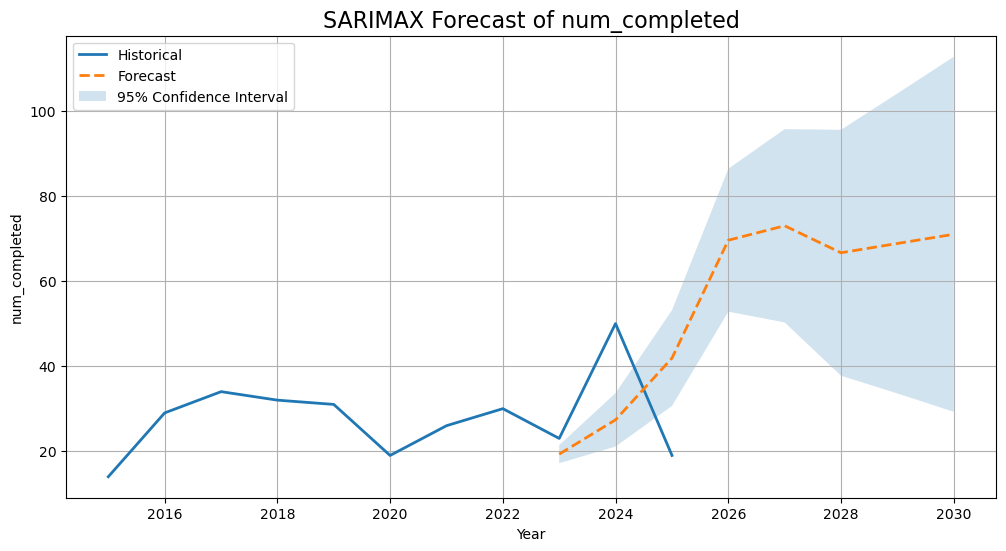

In [511]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot historical data
ax.plot(y.index.to_timestamp(), y, label='Historical', linewidth=2)

# Plot forecast
ax.plot(pred_mean.index.to_timestamp(), pred_mean, label='Forecast', linestyle='--', linewidth=2)

# Shade confidence interval
ax.fill_between(
    pred_mean.index.to_timestamp(),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.2,
    label='95% Confidence Interval'
)

ax.set_title('SARIMAX Forecast of num_completed', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('num_completed')
ax.legend()
ax.grid(True)
plt.show()

Get MAE

In [512]:
# Filter y_test to 2023 and 2024
y_test_filt = y_test[y_test.index < pd.Period(2025, freq='Y')]

# Select only the forecast column for 2023–2024
forecast_filt = forecast_df["forecast"]

# Align using concat
aligned = pd.concat(
    [y_test_filt.rename("num_completed"), forecast_filt.rename("forecast")],
    axis=1,
    join="inner"
)

# Compute residuals
aligned["residual"] = aligned["num_completed"] - aligned["forecast"]
aligned["abs_error"] = aligned["residual"].abs()

# MAE
mae = aligned["abs_error"].mean()

mae


np.float64(13.160139452123119)

Three models were run:
- an ARIMA model without exogenous predictors (Mean Absolute Error: 13.5)
- A SARIMAX model with covid indicators, population, interest rate, and number of applications the year prior as exogenous predictors (failed to converge)
- A SARIMAX model with covid indicators, population, and interest rate as exogenous predictors (Mean Absolute Error: 13.2)

For future calculations I am picking the third model as it had the lowest MAE.

Create a metric that is number of new buildings per population growth

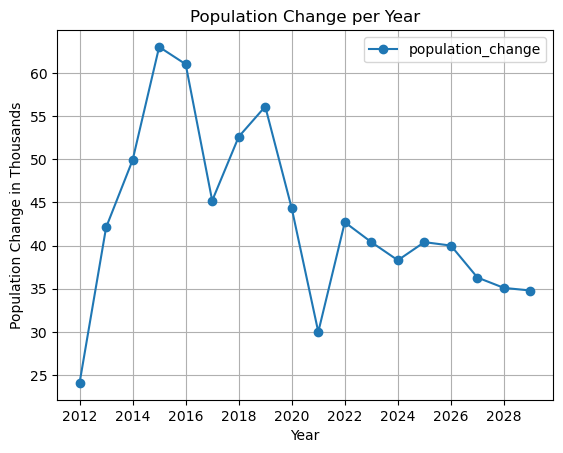

In [513]:
# compute population change
pop_interest_per_year["population_change"] = pop_interest_per_year["Population"].astype(float).diff()
pop_interest_per_year = pop_interest_per_year.dropna(subset=['population_change'])

# plot
ax = pop_interest_per_year.plot(x='Year', y='population_change', kind='line', marker='o')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.ylabel('Population Change in Thousands')
plt.title('Population Change per Year')
plt.grid(True)
plt.show()


Add population change information to the forecasted dataframe output by the model. Create a metric 'ratio' that is the number of completed large multifamily buildings divided by the population change in thousands.

In [514]:
# Convert y.index from PeriodIndex to int
y_df = pd.DataFrame({
    'Year': y.index.year, 
    'num_completed': y.values
})
y_df = y_df.merge(pop_interest_per_year, on='Year')
y_df['ratio'] = y_df['num_completed'] / y_df['population_change']

forecast_df_reset = forecast_df.reset_index().rename(columns={'index':'Year'})
forecast_df_reset['Year'] = forecast_df_reset['Year'].dt.year
forecast_df_merged = forecast_df_reset.merge(pop_interest_per_year, on='Year')
forecast_df_merged['ratio'] = forecast_df_merged['forecast'] / forecast_df_merged['population_change']

Plot how the number of completed large multifamily buildings per population change has looked historically. Add in a separate color with our forecast of number of copmleted large MF buildings what this ratio might look like five years in the future.

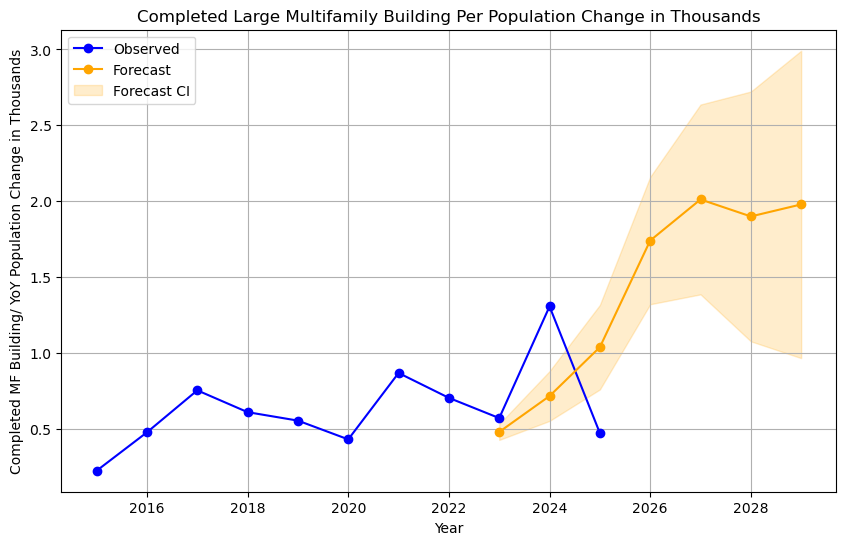

In [515]:
# Plot
plt.figure(figsize=(10, 6))

# Observed
plt.plot(y_df['Year'], y_df['ratio'], marker='o', color='blue', label='Observed')

# Forecast
plt.plot(forecast_df_merged['Year'], forecast_df_merged['ratio'], marker='o', color='orange', label='Forecast')

# Confidence interval
plt.fill_between(forecast_df_merged['Year'],
                 forecast_df_merged['lower_ci'] / forecast_df_merged['population_change'],
                 forecast_df_merged['upper_ci'] / forecast_df_merged['population_change'],
                 color='orange', alpha=0.2, label='Forecast CI')

plt.xlabel('Year')
plt.ylabel('Completed MF Building/ YoY Population Change in Thousands')
plt.title('Completed Large Multifamily Building Per Population Change in Thousands')
plt.legend()
plt.grid(True)

# Save the plot. Uncomment if you want to overwrite plots
# plt.savefig("plots/completed_buildings_per_population_change.png", dpi=300)

plt.show()

**Research Question 4 Discussion**: The updward direction of the orange line indicates that the ratio of completed multifamily buildings per year over year population change is forecasted to increase. It is forecasted to double but there is a confidence interval associated with this prediction which is shown and gets much wider closer to 2030.